In [3]:
import skimage
print(skimage.__version__)
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import cv2
from skimage import data
from skimage import io
from skimage import color
from skimage import filters
from skimage import util
from google.colab.patches import cv2_imshow
import time
import glob
import os
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

0.19.3
Mounted at /content/drive


In [ ]:
runs = 10**4
H_SIZE = 10
W_SIZE = 10

(514, 539, 3)


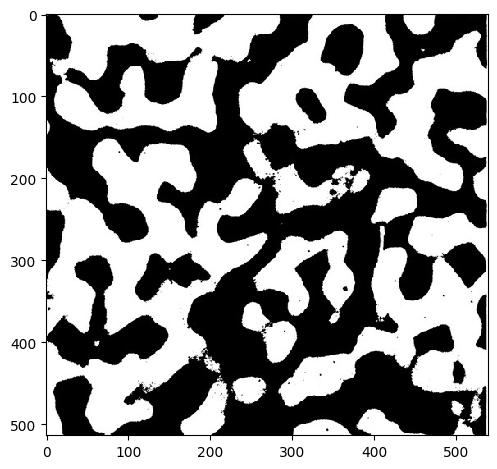

In [ ]:
L = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Laughlin_and_Soffa.jpg')
print(np.shape(L))
io.imshow(L)

(211, 215, 3)


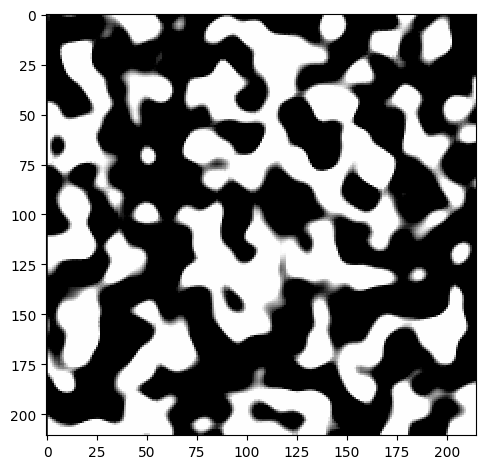

In [ ]:
Sim=cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Laughlin_Replication_Results.PNG')
print(np.shape(Sim))
io.imshow(Sim)

In [ ]:
L = cv2.cvtColor(L, cv2.COLOR_BGR2GRAY)
Sim = cv2.cvtColor(Sim, cv2.COLOR_BGR2GRAY)

In [ ]:
retL,threshL = cv2.threshold(L,70,255,0)
retSim,threshSim = cv2.threshold(Sim,70,255,0)

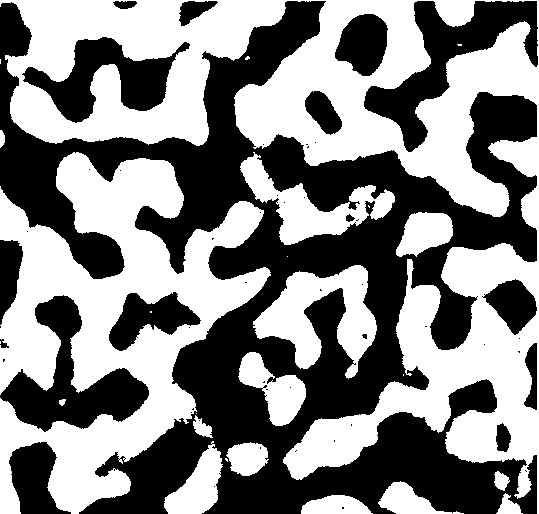

In [ ]:
cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/L_bw_' + str(H_SIZE*W_SIZE)+ '.png'),threshL)
L_bw = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/L_bw_' + str(H_SIZE*W_SIZE)+ '.png')
L_bw = cv2.cvtColor(L_bw, cv2.COLOR_BGR2GRAY)
cv2_imshow(L_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

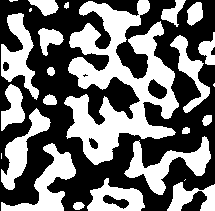

In [ ]:
cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_' + str(H_SIZE*W_SIZE) + '.png'),threshSim)
Sim_bw = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_' + str(H_SIZE*W_SIZE) + '.png')
Sim_bw = cv2.cvtColor(Sim_bw, cv2.COLOR_BGR2GRAY)
cv2_imshow(Sim_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
percent_blk_L= cv2.countNonZero(L_bw)/(L_bw.shape[0]*L_bw.shape[1])*100
print("The overall percentatge of black pixles in the Laughlin and Soffa results is: ", percent_blk_L)
percent_blk_Sim= cv2.countNonZero(Sim_bw)/(Sim_bw.shape[0]*Sim_bw.shape[1])*100
print("The overall percentage of back pixles in our model is: ",percent_blk_Sim)

NameError: ignored

In [ ]:
img = L_bw
img2=img;
height, width = img.shape
L_blk_percent_array = np.zeros((H_SIZE,W_SIZE))
for ih in range(H_SIZE):
   for iw in range(W_SIZE):
      x = width/W_SIZE * iw
      y = height/H_SIZE * ih
      h = (height / H_SIZE)
      w = (width / W_SIZE )
      img = img[int(y):int(y+h), int(x):int(x+w)]
      NAME = str(time.time())
      cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/L_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png'),img)
      L_bw_temp = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/L_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png')
      L_bw_temp = cv2.cvtColor(L_bw_temp, cv2.COLOR_BGR2GRAY)
      L_blk_percent_array[ih,iw] = (cv2.countNonZero(L_bw_temp)/((L_bw.shape[0]*L_bw.shape[1])/(H_SIZE*W_SIZE))*100)
      img = img2
L_blk_mean_comp = np.mean(L_blk_percent_array)
print ("The mean percentage of black pixles for Laughlin and Soffa if we divide the image into:" , H_SIZE*W_SIZE, " equal sections is: ", L_blk_mean_comp)
L_blk_std = np.std(L_blk_percent_array)
print ("With a standard deviation beteween sections of: " ,L_blk_std)

The mean percentage of black pixles for Laughlin and Soffa if we divide the image into: 100  equal sections is:  51.979815626285884
With a standard deviation beteween sections of:  20.883001820322114


In [ ]:
img = Sim_bw
img2=img;
height, width = img.shape
Sim_blk_percent_array = np.zeros((H_SIZE,W_SIZE))
for ih in range(H_SIZE):
   for iw in range(W_SIZE):
      x = width/W_SIZE * iw
      y = height/H_SIZE * ih
      h = (height / H_SIZE)
      w = (width / W_SIZE )
      img = img[int(y):int(y+h), int(x):int(x+w)]
      NAME = str(time.time())
      cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Sim_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png'),img)
      Sim_bw_temp = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png')
      Sim_bw_temp = cv2.cvtColor(Sim_bw_temp, cv2.COLOR_BGR2GRAY)
      Sim_blk_percent_array[ih,iw] = (cv2.countNonZero(Sim_bw_temp)/((Sim_bw.shape[0]*Sim_bw.shape[1])/(H_SIZE*W_SIZE))*100)
      img = img2
Sim_blk_mean_comp = np.mean(Sim_blk_percent_array)
print("The mean percentage of black pixles for our simulation if we divide the image into:" , H_SIZE*W_SIZE, " equal sections is: ", Sim_blk_mean_comp)
Sim_blk_std = np.std(Sim_blk_percent_array)
print ("With a standard devaition between sections of: ", Sim_blk_std)

The mean percentage of black pixles for our simulation if we divide the image into: 100  equal sections is:  44.60266725449135
With a standard devaition between sections of:  20.77999995774466


In [ ]:
L_blk_percent_array = L_blk_percent_array.reshape(1,H_SIZE*W_SIZE)
data_L_means = np.zeros(runs)
for i in range (0,runs):
  data_L_means[i] = np.mean(np.random.choice(L_blk_percent_array[0],H_SIZE*W_SIZE))
data_L = (data_L_means,)
bootstrap_ci_L = bootstrap(data_L, np.median, confidence_level=0.95,random_state=1)
print("If we divide the Laughlin images into: ", H_SIZE*W_SIZE, "equal sections, then bootstrap our results for: ", runs, " runs, then our mean, with 95% confidence, should lie in the following range: ", bootstrap_ci_L.confidence_interval)
print("With a Standard error of: ",bootstrap_ci_L.standard_error)
L_SE = bootstrap_ci_L.standard_error
L_CI = bootstrap_ci_L.confidence_interval

If we divide the Laughlin images into:  100 equal sections, then bootstrap our results for:  10000  runs, then our mean, with 95% confidence, should lie in the following range:  ConfidenceInterval(low=51.957436671166526, high=52.058141969203675)
With a Standard error of:  0.026110426805111404


In [ ]:
Sim_blk_percent_array = Sim_blk_percent_array.reshape(1,H_SIZE*W_SIZE)
data_Sim_means = np.zeros(runs)
for i in range (0,runs):
  data_Sim_means[i] = np.mean(np.random.choice(Sim_blk_percent_array[0],H_SIZE*W_SIZE))
data_Sim = (data_Sim_means,)
bootstrap_ci_Sim = bootstrap(data_Sim, np.median, confidence_level=0.95,random_state=1)
print("If we divide the Simulation images into: ", H_SIZE*W_SIZE, "equal sections, then bootstrap our results for: ", runs, " runs, then our mean, with 95% confidence, should lie in the following range: ",bootstrap_ci_Sim.confidence_interval)
print("With a standard error of:",bootstrap_ci_Sim.standard_error)
Sim_SE = bootstrap_ci_Sim.standard_error
Sim_CI = bootstrap_ci_Sim.confidence_interval

If we divide the Simulation images into:  100 equal sections, then bootstrap our results for:  10000  runs, then our mean, with 95% confidence, should lie in the following range:  ConfidenceInterval(low=44.50788052463352, high=44.60266725449135)
With a standard error of: 0.02433105866334665


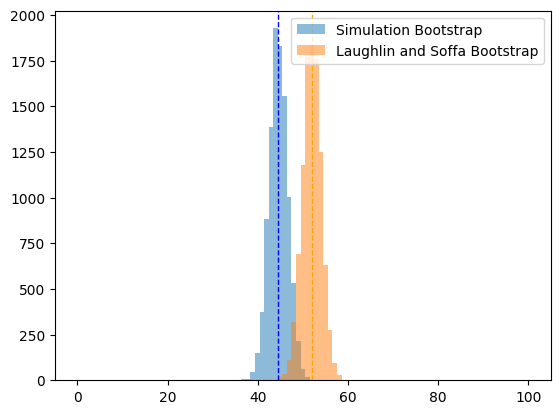

Here is a histogram comparison of the two bootstrapped results:
Vertical lines indicate the mean of the data with the associated data color


In [ ]:
bins = np.linspace(0,100,100)
plt.hist(data_Sim, bins, alpha=0.5, label='Simulation Bootstrap')
plt.hist(data_L, bins, alpha=0.5, label='Laughlin and Soffa Bootstrap')
plt.legend(loc='upper right')
plt.axvline(data_Sim_means.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(data_L_means.mean(), color='orange', linestyle='dashed', linewidth=1)
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Laughlin_Soffa_bootstrap_' + str(H_SIZE*W_SIZE)+ '.png')
plt.show()
print("Here is a histogram comparison of the two bootstrapped results:")
print("Vertical lines indicate the mean of the data with the associated data color")


In [ ]:
Sim_bw_inverted = cv2.bitwise_not(Sim_bw)
cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Sim_inverted_' + str(H_SIZE*W_SIZE) + '.png'), Sim_bw_inverted)
Sim_bw_inverted = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_inverted_' + str(H_SIZE*W_SIZE) + '.png')
Sim_bw_inverted = cv2.cvtColor(Sim_bw_inverted, cv2.COLOR_BGR2GRAY)

img = Sim_bw_inverted
img2=img;
height, width = img.shape
Sim_inverted_blk_percent_array = np.zeros((H_SIZE,W_SIZE))
for ih in range(H_SIZE):
   for iw in range(W_SIZE):
      x = width/W_SIZE * iw
      y = height/H_SIZE * ih
      h = (height / H_SIZE)
      w = (width / W_SIZE )
      img = img[int(y):int(y+h), int(x):int(x+w)]
      NAME = str(time.time())
      cv2.imwrite(os.path.join('/content/drive/MyDrive/Colab_Notebooks/Sim_inverted_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png'),img)
      Sim_bw_temp = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_inverted_sub_' + str(H_SIZE*W_SIZE) + '_' + str(ih)+str(iw) +  '.png')
      Sim_bw_temp = cv2.cvtColor(Sim_bw_temp, cv2.COLOR_BGR2GRAY)
      Sim_inverted_blk_percent_array[ih,iw] = (cv2.countNonZero(Sim_bw_temp)/((Sim_bw_inverted.shape[0]*Sim_bw_inverted.shape[1])/(H_SIZE*W_SIZE))*100)
      img = img2
Sim_inverted_blk_mean_comp = np.mean(Sim_inverted_blk_percent_array)
print("The mean percentage of black pixles for our simulation if we divide the image into:" , H_SIZE*W_SIZE, " equal sections and invert the colors is: ", Sim_inverted_blk_mean_comp)
Sim_inverted_blk_std = np.std(Sim_inverted_blk_percent_array)
print ("With a standard devaition between sections of: ", Sim_inverted_blk_std)

The mean percentage of black pixles for our simulation if we divide the image into: 100  equal sections and invert the colors is:  55.397332745508635
With a standard devaition between sections of:  20.923349559472932


In [ ]:
percent_blk_Sim_inverted = cv2.countNonZero(Sim_bw_inverted)/(Sim_bw_inverted.shape[0]*Sim_bw_inverted.shape[1])*100
print("The overall percentage of back pixles in our inverted model is: ",percent_blk_Sim_inverted)
print("The overall percentatge of black pixles in the Laughlin and Soffa results is: ", percent_blk_L)

The overall percentage of back pixles in our inverted model is:  55.397332745508656
The overall percentatge of black pixles in the Laughlin and Soffa results is:  51.979815626285884


In [ ]:
Sim_inverted_blk_percent_array = Sim_inverted_blk_percent_array.reshape(1,H_SIZE*W_SIZE)
data_Sim_inverted_means = np.zeros(runs)
for i in range (0,runs):
  data_Sim_inverted_means[i] = np.mean(np.random.choice(Sim_inverted_blk_percent_array[0],H_SIZE*W_SIZE))
data_Sim_inverted = (data_Sim_inverted_means,)
bootstrap_ci_Sim_inverted = bootstrap(data_Sim_inverted, np.median, confidence_level=0.95,random_state=1)
print("If we divide the Simulation images into: ", H_SIZE*W_SIZE, "equal sections, invert the color, and then bootstrap our results for: ", runs, " runs, then our mean, with 95% confidence, should lie in the following range: ",bootstrap_ci_Sim_inverted.confidence_interval)
print("With a standard error of:",bootstrap_ci_Sim_inverted.standard_error)
Sim_inverted_SE = bootstrap_ci_Sim_inverted.standard_error
Sim_inverted_CI = bootstrap_ci_Sim_inverted.confidence_interval

If we divide the Simulation images into:  100 equal sections, invert the color, and then bootstrap our results for:  10000  runs, then our mean, with 95% confidence, should lie in the following range:  ConfidenceInterval(low=55.31136338587017, high=55.41496748594732)
With a standard error of: 0.023897351891093203


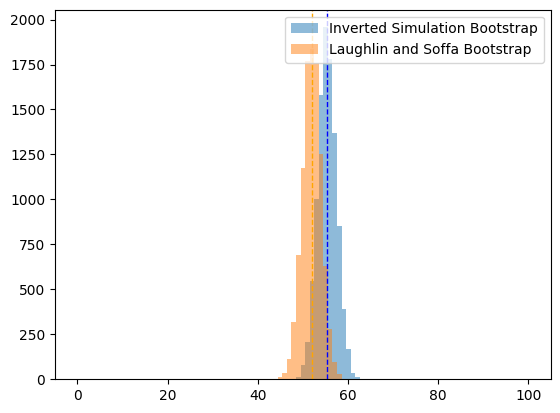

Here is a histogram comparison of the two bootstrapped results:
Vertical lines indicate the mean of the data with the associated data color


In [ ]:
bins = np.linspace(0,100,100)
plt.hist(data_Sim_inverted, bins, alpha=0.5, label='Inverted Simulation Bootstrap')
plt.hist(data_L, bins, alpha=0.5, label='Laughlin and Soffa Bootstrap')
plt.axvline(data_Sim_inverted_means.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(data_L_means.mean(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Laughlin_Soffa_bootstrap_inverted_' + str(H_SIZE*W_SIZE) + '.png')
plt.show()
print("Here is a histogram comparison of the two bootstrapped results:")
print("Vertical lines indicate the mean of the data with the associated data color")


Here is what the inverted simulation image should look like: 


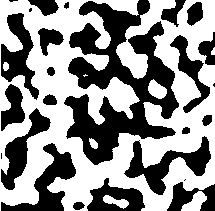

Here is what Laughlin and Soffa looks like: 


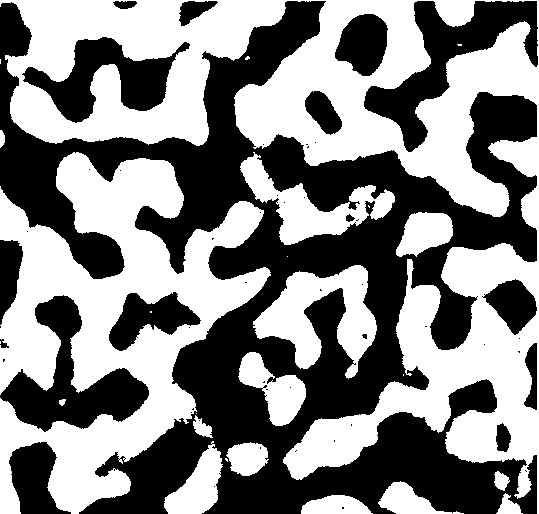

In [ ]:
print("Here is what the inverted simulation image should look like: ")
cv2_imshow(Sim_bw_inverted)
print("Here is what Laughlin and Soffa looks like: ")
cv2_imshow(L_bw)

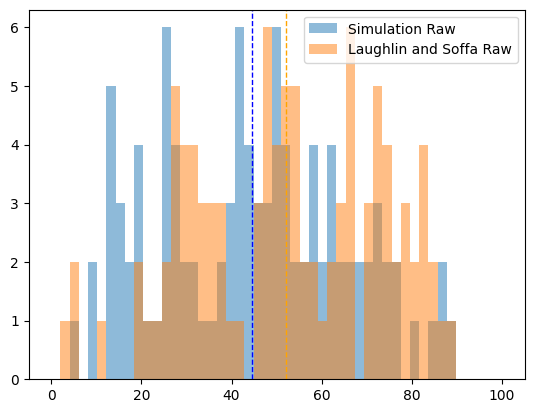

Vertical lines indicate the mean of the data with the associated data color


In [ ]:
bins = np.linspace(0,100,50)
Sim_blk_percent_array = np.reshape(Sim_blk_percent_array,(H_SIZE*W_SIZE))
L_blk_percent_array = np.reshape(L_blk_percent_array,(H_SIZE*W_SIZE))
plt.hist(Sim_blk_percent_array, bins = bins, alpha = 0.5, label='Simulation Raw')
plt.hist(L_blk_percent_array, bins = bins, alpha = 0.5, label='Laughlin and Soffa Raw')
plt.axvline(Sim_blk_percent_array.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(L_blk_percent_array.mean(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Laughlin_Soffa_comparison_raw_' + str(H_SIZE*W_SIZE) + '.png')
plt.show()
print("Vertical lines indicate the mean of the data with the associated data color")


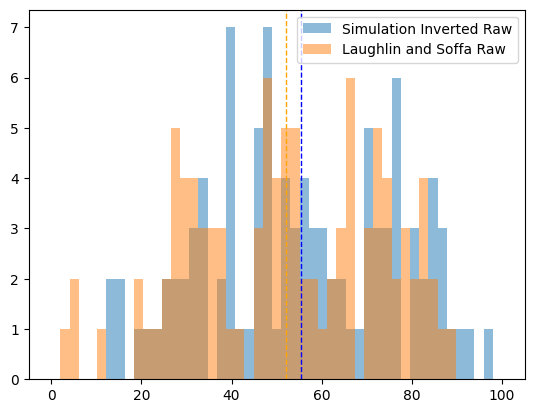

Vertical lines indicate the mean of the data with the associated data color


In [ ]:
Sim_inverted_blk_percent_array = np.reshape(Sim_inverted_blk_percent_array,(H_SIZE*W_SIZE))
plt.hist(Sim_inverted_blk_percent_array, bins = bins, alpha = 0.5, label='Simulation Inverted Raw')
plt.hist(L_blk_percent_array, bins = bins, alpha = 0.5, label='Laughlin and Soffa Raw')
plt.axvline(Sim_inverted_blk_percent_array.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(L_blk_percent_array.mean(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Laughlin_Soffa_comparison_inverted_raw_' + str(H_SIZE*W_SIZE)+ '.png')
plt.show()
print("Vertical lines indicate the mean of the data with the associated data color")


In [ ]:
L_bw_resize = np.round((1/255)*skimage.color.rgb2gray(skimage.transform.resize(skimage.io.imread('/content/drive/MyDrive/Colab_Notebooks/Laughlin_and_Soffa.jpg'),[200,200], preserve_range = 'TRUE', mode = 'wrap')),0).astype(int)
Sim_bw_resize = np.round((1/255)*skimage.color.rgb2gray(skimage.transform.resize(skimage.io.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_bw.jpg'),[200,200], preserve_range = 'TRUE', mode = 'wrap')),0).astype(int)
Sim_bw_resize_temp = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_resize_temp.jpg', (Sim_bw_resize*255).astype(np.uint8))
Sim_inverted_bw_resize = skimage.util.invert(skimage.io.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_resize_temp.jpg'))
Sim_inverted_bw_resize = np.round((1/255)*skimage.color.rgb2gray(skimage.transform.resize(Sim_inverted_bw_resize,[200,200,3], preserve_range = 'TRUE', mode = 'wrap')),0).astype(int)
L_vs_Sim_RMSE = skimage.metrics.normalized_root_mse(L_bw_resize.astype(float), Sim_bw_resize.astype(float), normalization = 'min-max')*(L_bw_resize.astype(float).max() - L_bw_resize.astype(float).min())
L_vs_Sim_inverted_RMSE = skimage.metrics.normalized_root_mse(L_bw_resize.astype(float), Sim_inverted_bw_resize.astype(float), normalization = 'min-max')*(L_bw_resize.astype(float).max() - L_bw_resize.astype(float).min())
L_vs_Sim_PSNR = skimage.metrics.peak_signal_noise_ratio(L_bw_resize.astype(float), Sim_bw_resize.astype(float), data_range = L_bw_resize.max()-L_bw_resize.min())
L_vs_Sim_inverted_PSNR = skimage.metrics.peak_signal_noise_ratio(L_bw_resize.astype(float), Sim_inverted_bw_resize.astype(float), data_range = L_bw_resize.max()-L_bw_resize.min())
L_vs_Sim_SSIM = skimage.metrics.structural_similarity(L_bw_resize.astype(float), Sim_bw_resize.astype(float))
L_vs_Sim_inverted_SSIM = skimage.metrics.structural_similarity(L_bw_resize.astype(float), Sim_inverted_bw_resize.astype(float))
results_secondary = pd.DataFrame([L_vs_Sim_RMSE, L_vs_Sim_inverted_RMSE, L_vs_Sim_PSNR, L_vs_Sim_inverted_PSNR, L_vs_Sim_SSIM, L_vs_Sim_inverted_SSIM],['Sim RMSE','Inverted Sim RMSE', 'Sim PSNR', 'Inverted Sim PSNR', 'Sim SSIM', 'Inverted Sim SSIM'], columns = ['Stat'])
display(results_secondary)

,Stat
Sim RMSE,0.713810
Inverted Sim RMSE,0.700339
Sim PSNR,2.928345
Inverted Sim PSNR,3.093831
Sim SSIM,0.079842
Inverted Sim SSIM,0.095901


In [ ]:
L_vs_Sim_cc = np.concatenate([L_bw_resize.reshape((40000,1)),Sim_bw_resize.reshape((40000,1))],1)
L_vs_Sim_cc = pd.DataFrame(L_vs_Sim_cc)
L_vs_Sim_cc = L_vs_Sim_cc.corr()
L_vs_Sim_cc = np.array(L_vs_Sim_cc)
print('The correlation coefficient, pixel-for-pixel of the Simulation vs Laughlin and Soffa is: ', L_vs_Sim_cc[0,1])

L_vs_Sim_inverted_cc = np.concatenate([L_bw_resize.reshape((40000,1)),Sim_inverted_bw_resize.reshape((40000,1))],1)
L_vs_Sim_inverted_cc = pd.DataFrame(L_vs_Sim_inverted_cc)
L_vs_Sim_inverted_cc = L_vs_Sim_inverted_cc.corr()
L_vs_Sim_inverted_cc = np.array(L_vs_Sim_inverted_cc)
print('The correlation coefficient, pixel-for-pixel of the Inverted Simulation vs Laughlin and Soffa is: ',L_vs_Sim_inverted_cc[0,1])

The correlation coefficient, pixel-for-pixel of the Simulation vs Laughlin and Soffa is:  -0.01711285076890991
The correlation coefficient, pixel-for-pixel of the Inverted Simulation vs Laughlin and Soffa is:  0.017112850768909588


In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/LPIPS

/content/drive/MyDrive/Colab_Notebooks/LPIPS


In [2]:
import lpips
import torch

ModuleNotFoundError: ignored

In [ ]:
L_bw_resize = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/L_bw_resize.jpg', (L_bw_resize*255).astype(np.uint8))
Sim_bw_resize = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_resize.jpg', (Sim_bw_resize*255).astype(np.uint8))
L_bw_resize = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/L_bw_resize.jpg')
L_bw_resize = cv2.cvtColor(L_bw_resize, cv2.COLOR_BGR2RGB)
Sim_bw_resize = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_bw_resize.jpg'), cv2.COLOR_BGR2RGB)
transform = transforms.Compose([transforms.ToTensor()])
L_bw_resize = transform(L_bw_resize)
Sim_bw_resize = transform(Sim_bw_resize)
Sim_inverted_bw_resize = skimage.io.imsave('/content/drive/MyDrive/Colab_Notebooks/Sim_inverted_bw_resize.jpg', (Sim_inverted_bw_resize*255).astype(np.uint8))
Sim_inverted_bw_resize = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sim_inverted_bw_resize.jpg'), cv2.COLOR_BGR2RGB)
Sim_inverted_bw_resize = transform(Sim_inverted_bw_resize)
loss_fn = lpips.LPIPS(net='alex')
d = loss_fn.forward(L_bw_resize,Sim_bw_resize)
e = loss_fn.forward(L_bw_resize,Sim_inverted_bw_resize)
Sim_LPIPS = d.item()
Sim_inverted_LPIPS = e.item()
print(Sim_LPIPS)
print(Sim_inverted_LPIPS)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /content/drive/MyDrive/Colab_Notebooks/LPIPS/lpips/weights/v0.1/alex.pth
0.3475658595561981
0.3469125032424927


,Stat
Percent Black Laughlin,51.979816
Percent Black Simulation,44.602667
Percecnt Black Inverted Simulation,55.397333
STD of Percent Black Laughlin,20.883002
STD of Percent Black Simulation,20.780000
STD of Percent Black Inverted Simulation,20.923350
Simulation Linear Correlation Coefficient,-0.017113
Inverted Linear Correlation Coefficient,0.017113
Sim RMSE,0.713810
Inverted Sim RMSE,0.700339


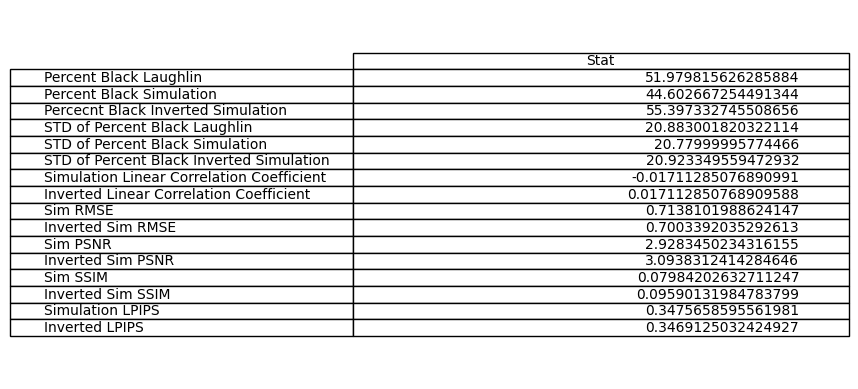

In [ ]:
LPIPS_results = pd.DataFrame([Sim_LPIPS,Sim_inverted_LPIPS],['Simulation LPIPS', 'Inverted LPIPS'], columns = ['Stat'])
Linear_cc_results = pd.DataFrame([L_vs_Sim_cc[0,1],L_vs_Sim_inverted_cc[0,1]], ['Simulation Linear Correlation Coefficient', 'Inverted Linear Correlation Coefficient'], columns = ['Stat'])
Percent_blk_results = pd.DataFrame([percent_blk_L, percent_blk_Sim, percent_blk_Sim_inverted], ['Percent Black Laughlin', 'Percent Black Simulation', 'Percecnt Black Inverted Simulation'], columns = ['Stat'])
Percent_blk_std_results = pd.DataFrame([L_blk_std, Sim_blk_std, Sim_inverted_blk_std],['STD of Percent Black Laughlin', 'STD of Percent Black Simulation', 'STD of Percent Black Inverted Simulation'], columns = ['Stat'])
Overall_results = pd.concat([Percent_blk_results,Percent_blk_std_results,Linear_cc_results,results_secondary,LPIPS_results])
display(Overall_results)
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText = Overall_results.values, rowLabels = Overall_results.index, colLabels=Overall_results.columns, loc='center')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Laughlin_and_Soffa_image_analysis_results.png', orientation = 'landscape', bbox_inches = 'tight')
plt.show()


 Code for LPIPS from:

 @inproceedings{zhang2018perceptual,
  title={The Unreasonable Effectiveness of Deep Features as a Perceptual Metric},
  author={Zhang, Richard and Isola, Phillip and Efros, Alexei A and Shechtman, Eli and Wang, Oliver},
  booktitle={CVPR},
  year={2018}
}